In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
def feedback_model(data, keywords):
    
    #create features df
    features = pd.DataFrame()
    features['Feedback'] = data['Feedback']
    
    for key in keywords:
        features[str(key)] = data.Message.str.contains(str(key), case=False)
       
    #data type back to boolean
    features['Feedback'] = features['Feedback'].map({1: True, 0: False})
    
    #check correlations
    sns.heatmap(features.corr(), cmap='RdBu_r', center=0, square=True)
    plt.show()
    
    #training dataset
    training = features[keywords]
    testing = features['Feedback']

    #use bernoulli since our data is boolean
    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()

    #fit
    bnb.fit(training, testing)

    #classify
    y_pred = bnb.predict(training)

    print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0], (testing != y_pred).sum()))
    
    return y_pred, training, testing

In [12]:
yelp = pd.read_table('/Users/Jenny/Documents/Thinkful/random downloaded data/yelp_labelled.txt', header=None)
yelp.columns = ['Message', 'Feedback']
yelp_keywords = ['great', 'amazing', 'prompt', 'awesome', 'beautiful', 'delicious', 'wow', 'favorite', 'love', 'enjoy']

In [9]:
yelp.head()

,Message,Feedback
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [13]:
yelp['Feedback'].value_counts()

1    500
0    500
Name: Feedback, dtype: int64

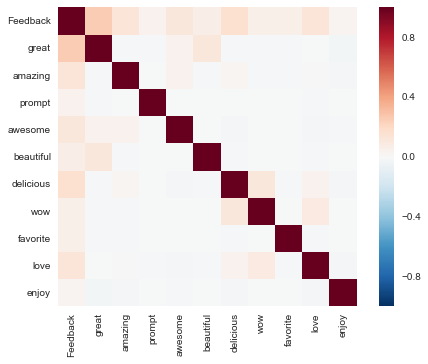

Number of mislabeled points out of a total 1000 points : 357


In [14]:
y_pred, training, testing = feedback_model(yelp, yelp_keywords)

In [15]:
#confusion matrix to eval.
confusion_matrix(testing, y_pred)

array([[487,  13],
       [344, 156]])

**Accuracy:**Overall, how often is the classifier correct?

* (TP+TN)/total = (487+156)/1000 = 0.63

**Misclassification/Error Rate:** Overall, how often is it wrong?

* (FP+FN)/total = (13+344)/1000 = .036

**True Positive Rate/Sensitivity:** When it's actually yes, how often does it predict yes?

* TP/actual yes = 156/500 = 0.31


**False Positive Rate:** When it's actually no, how often does it predict yes?

* FP/actual no = 13/500 = 0.03

**Specificity:** When it's actually no, how often does it predict no?

* TN/actual no = 487/500 = 0.97

**Precision:** When it predicts yes, how often is it correct?

* TP/predicted yes = 156/169 = 0.92

**Prevalence:** How often does the yes condition actually occur in our sample?

* actual yes/total = 500/1000 = 0.5

In [16]:
#Check overfitting (make a function?)

# Divide dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(training, testing, test_size=0.2)

training = pd.concat([X_train, Y_train], axis=1)
testing = pd.concat([X_test, Y_test], axis=1)

# Train the model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(X_train, Y_train)

# Test the model
y_pred = bnb.predict(X_test)

# Model performance on testing set
print("Number of mislabeled points out of a total {} points : {}".format(X_test.shape[0], (Y_test != y_pred).sum()))

# Confusion matrix to evaluate the classifier
confusion_matrix(Y_test, y_pred)

Number of mislabeled points out of a total 200 points : 70


array([[102,   3],
       [ 67,  28]])

**Sensitivity** is 26%, **Specificity** is 97%, **Accuracy** is 65%; overfitting?

In [17]:
#look at negative feedback
yelp[yelp['Feedback'] == 0].Message

1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
5         Now I am getting angry and I want my damn pho.
6                  Honeslty it didn't taste THAT fresh.)
7      The potatoes were like rubber and you could te...
11                                    Would not go back.
12     The cashier had no care what so ever on what I...
14     I was disgusted because I was pretty sure that...
15     I was shocked because no signs indicate cash o...
17                Waitress was a little slow in service.
18     This place is not worth your time, let alone V...
19                                  did not like at all.
20                                   The Burrittos Blah!
26            - They never brought a salad we asked for.
28     Took an hour to get our food only 4 tables in ...
29                     The worst was the salmon sashimi.
31                         This was like the final blow!
33     seems like a good quick 

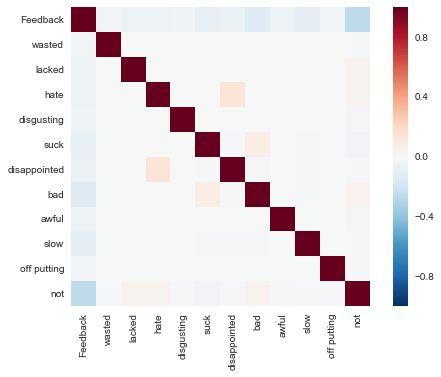

Number of mislabeled points out of a total 1000 points : 362


In [18]:
yelp_keywords_negative = ['wasted', 'lacked', 'hate', 'disgusting', 'suck', 'disappointed', 'bad', 'awful', 'slow', 'off putting', 'not']

#run the model with negative keywords
y_pred, training, testing = feedback_model(yelp, yelp_keywords_negative)

In [19]:
confusion_matrix(testing, y_pred)

array([[163, 337],
       [ 25, 475]])

**Sensitivity** is 95%, **Specificity** is 32%, **Accuracy** is 63%; overfitting?